# importing libraries


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from fcmeans import FCM


# reading dataset

In [ ]:
df=pd.read_csv("E:student-mat-pass-or-fail.csv")
df.shape

(395, 30)

In [ ]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,...,3,2,1,2,5,4,6,10,10,1


In [ ]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.883544,0.526582,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,1.448101,2.035443,...,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,0.670886
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,...,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.470487
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,0.000000
50%,1.000000,1.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,2.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,1.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,1.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


In [ ]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
pass          0
dtype: int64

# Declare feature vector and target variable

In [ ]:
X=df.drop(columns="pass")
y=df["pass"]
y

0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: pass, Length: 395, dtype: int64

# Splitting Data

# Elbow Method to choose the best number of clusters

C:\Users\smart\Downloads\Programs\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


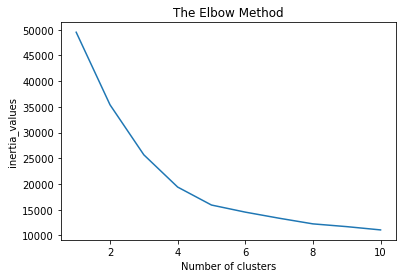

In [ ]:
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 50, n_init = 10)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia_values)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia_values')
plt.show()


# K-Means Model

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=9) #2 9 17

kmeans.fit(X)


labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


KM_accuracy=correct_labels/float(y.size)*100

print("Accuracy_score :",KM_accuracy)



Result: 283 out of 395 samples were correctly labeled.
Accuracy_score : 71.64556962025317


# Calculating Details

In [ ]:
print('KMeansModel centroids :\n \n ' ,kmeans.cluster_centers_)

KMeansModel centroids :
 
  [[ 0.86451613  0.6        16.73548387  0.73548387  0.24516129  0.92258065
   2.47096774  2.29032258  1.5483871   2.          0.5483871   0.19354839
   0.6516129   0.41290323  0.49677419  0.8         0.90967742  0.78709677
   0.34193548  4.00645161  3.20645161  3.26451613  1.43870968  2.29677419
   3.5483871   3.09677419  8.11612903  7.6         6.66451613]
 [ 0.87845304  0.44751381 16.46961326  0.79005525  0.30939227  0.88950276
   2.93370166  2.70165746  1.38674033  2.15469613  0.07734807  0.0718232
   0.56353591  0.50828729  0.5359116   0.78453039  0.98895028  0.84530387
   0.27624309  3.94475138  3.26519337  2.91160221  1.43646409  2.13259669
   3.5801105   3.33701657 13.50276243 13.64640884 13.79558011]
 [ 0.94915254  0.57627119 17.28813559  0.84745763  0.33898305  0.84745763
   2.91525424  2.57627119  1.37288136  1.76271186  0.55932203  0.13559322
   0.66101695  0.42372881  0.45762712  0.81355932  0.93220339  0.91525424
   0.49152542  3.77966102  3.2203

In [ ]:
print('KMeansModel labels are :\n ' , kmeans.labels_)

KMeansModel labels are :
  [0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 2 0 1 1 1 1 0 2 1 1 1 2 1 1 1 0 1 0 1
 1 1 1 2 1 1 0 2 0 2 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1
 2 0 1 1 0 0 1 1 0 1 0 0 0 1 2 2 0 1 0 0 1 0 1 0 1 0 2 1 1 2 1 1 0 1 1 1 1
 0 1 1 0 1 1 1 2 1 1 1 1 2 0 1 0 0 0 1 0 0 2 2 0 0 0 0 1 1 0 0 1 1 0 0 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 2 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 2 2
 2 1 1 0 0 1 0 2 0 1 1 1 0 2 0 1 0 0 2 0 2 0 1 0 0 0 2 1 2 2 1 2 2 0 0 0 0
 1 1 1 2 1 1 2 1 2 1 2 1 2 0 1 2 1 0 2 1 0 1 0 1 1 2 0 1 0 0 0 0 1 0 1 2 1
 0 2 0 1 0 0 1 0 1 0 0 2 1 1 1 0 1 2 2 2 0 2 2 1 0 0 1 1 1 1 1 1 1 2 1 1 1
 0 0 1 1 2 1 1 1 2 1 1 2 1 2 0 2 1 2 2 2 0 0 1 1 2 2 1 1 1 1 1 0 0 1 0 1 0
 0 0 2 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1
 0 1 1 2 1 0 1 0 1 2 1 0 1 0 2 0 0 0 0 0 0 1 0 1 0]


In [ ]:
print('KMeansModel intertia is :' , kmeans.inertia_)

KMeansModel intertia is : 25673.637985917496


In [ ]:
print('KMeansModel No. of iteration is : ' , kmeans.n_iter_)

KMeansModel No. of iteration is :  14


# C-Means Model 

In [ ]:
CM=FCM(n_clusters=2,random_state=19,max_iter=100,m=1.5)
CM.fit(X.to_numpy())
pred_CM = CM.soft_predict(X.to_numpy()) #soft
pred_CM   # Fuzzy values (membership function)







# applying alpha _cut

In [ ]:
def alph_cut(alpha,y_fuzzy):
  labels=[]
  memberships_length=len(y_fuzzy)
  for i in range(memberships_length):
    if (alpha<=y_fuzzy[i][0]):
      labels.append(0)
    else:
      labels.append(1)
  return labels

# at alpha_cut = .2

In [ ]:
predictied=alph_cut(.2,pred_CM)

correct_labels = sum(y == predictied)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


CM_accuracy=correct_labels/float(y.size)*100

print("Accuracy_score :",CM_accuracy)


Result: 280 out of 395 samples were correctly labeled.
Accuracy_score : 70.88607594936708


# at alpha_cut = .3

In [ ]:
predictied=alph_cut(.3,pred_CM)

correct_labels = sum(y == predictied)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


CM_accuracy=correct_labels/float(y.size)*100

print("Accuracy_score :",CM_accuracy)

Result: 302 out of 395 samples were correctly labeled.
Accuracy_score : 76.45569620253164


# at alpha_cut = .4

In [ ]:
predictied=alph_cut(.4,pred_CM)

correct_labels = sum(y == predictied)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


CM_accuracy=correct_labels/float(y.size)*100

print("Accuracy_score :",CM_accuracy)

Result: 315 out of 395 samples were correctly labeled.
Accuracy_score : 79.74683544303798


# at alpha_cut = .5

In [ ]:
predictied=alph_cut(.5,pred_CM)

correct_labels = sum(y == predictied)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


CM_accuracy=correct_labels/float(y.size)*100

print("Accuracy_score :",CM_accuracy)

Result: 335 out of 395 samples were correctly labeled.
Accuracy_score : 84.81012658227847


# at alpha_cut = .7

In [ ]:
predictied=alph_cut(.7,pred_CM)

correct_labels = sum(y == predictied)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


CM_accuracy=correct_labels/float(y.size)*100

print("Accuracy_score :",CM_accuracy)

Result: 357 out of 395 samples were correctly labeled.
Accuracy_score : 90.37974683544304


# Conclusion

In [ ]:
Models=["Fuzzy C-Means","K-Means"]
model_data = [CM_accuracy  , KM_accuracy ]
cols = ["Accuracy_score"]
compare=pd.DataFrame(data=model_data , index= Models , columns= cols)
compare.sort_values(ascending= False , by = ['Accuracy_score'])

,Accuracy_score
Fuzzy C-Means,90.379747
K-Means,71.645570
